### MA(1) with $\theta = -0.9$ and normal white noise $e_t$

In [20]:
import numpy as np

np.random.normal()

-1.3081292216516813

In [142]:
def MA1_seq(theta, n = 10, prnd=np.random.normal):
    e = prnd()
    yield e
    for i in range(n):
        last_e = e
        e = prnd()
        yield e - theta*last_e

In [143]:
theta = -0.9
Y = [y for y in MA1_seq(theta, n=1000)]

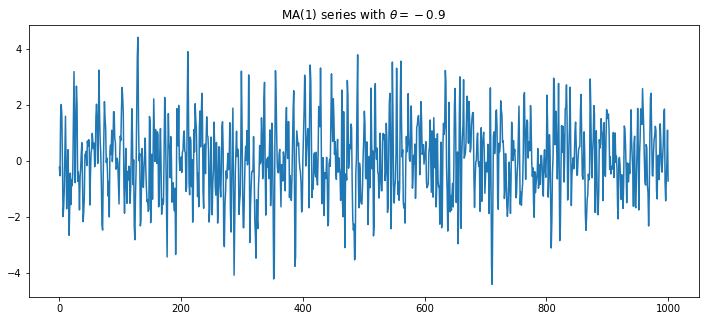

In [144]:
import matplotlib.pyplot as plt

x = [t for t in range(1001)]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(f'MA(1) series with $ \\theta={theta}$')
ax.plot(x, Y)
_ = plt.show()

### Plot $[Y_t, Y_{t-1}]$

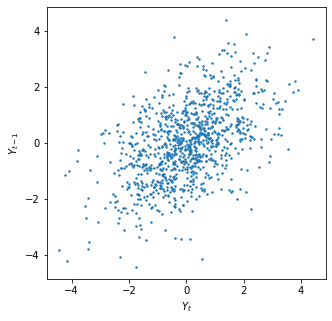

In [145]:
Y_t = np.array(Y[1:], dtype=np.float64)
Y_t_1 = np.array(Y[:-1], dtype=np.float64)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y_t, Y_t_1, s=2)
ax.set_xlabel('$Y_t$')
ax.set_ylabel('$Y_{t-1}$')
_=plt.show()

In [146]:
import scipy.stats as sts
#test fitted lines
params = np.polyfit(Y_t, Y_t_1, 1)
print(params)

params2 = sts.linregress(Y_t, Y_t_1)
print(params2)

[0.49994556 0.01126764]
LinregressResult(slope=0.49994555592006534, intercept=0.01126764096984927, rvalue=0.5000122117626611, pvalue=2.2596124592678853e-64, stderr=0.02740967754049659, intercept_stderr=0.037287438274968915)


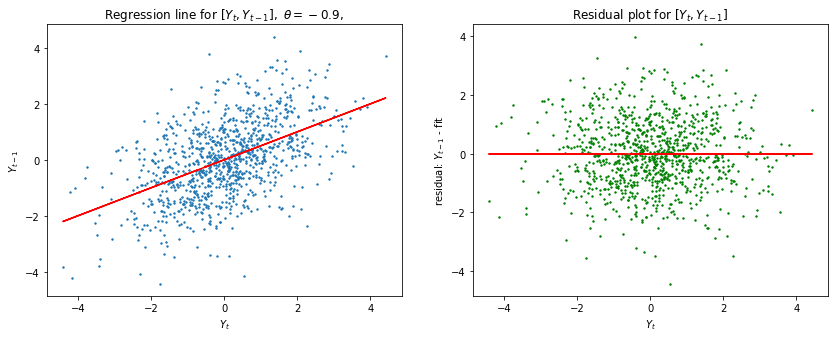

In [147]:
# What happens if we generate a fitted line to the plot above and then 
# look at residual statistics?

params = np.polyfit(Y_t, Y_t_1, 1)
params
fit = params[1] + params[0]*Y_t
fig, axs = plt.subplots(1,2,figsize=(14,5))
axs[0].scatter(Y_t, Y_t_1, s=2)
axs[0].plot(Y_t, fit, color="red")
axs[0].set_xlabel('$Y_t$')
axs[0].set_ylabel('$Y_{t-1}$')
axs[0].set_title(f'Regression line for $[Y_t, Y_{{t-1}}],\ \\theta = {theta}$, ')

# residual plot
axs[1].scatter(Y_t, Y_t_1 - fit, s=2, color="green")
axs[1].plot(Y_t, np.zeros(Y_t.shape[0]), color="red")
axs[1].set_xlabel('$Y_t$')
axs[1].set_ylabel('residual: $Y_{t-1}$ - fit')
axs[1].set_title('Residual plot for $[Y_t, Y_{t-1}]$')

_=plt.show()

In [148]:
# calculate the expectation and the standard deviation of the residuals
residuals = Y_t_1 - fit
print(np.round(residuals.mean()))
print(np.round(residuals.std()))

0.0
1.0


### Expectation, Variance, Covariance, and Correlation.
The following equations apply to statistics related to the calculation of each step of $Y_t$, 

$$E(Y_t) = 0$$ 
$$\gamma_0 = Var(Y_t) = \sigma_e^2(1+\theta^2)$$
$$\gamma_1 = Cov(Y_t, Y_{t-1}) = -\theta \sigma_e^2$$
$$\rho_1 = Corr(Y_t, Y_{t-1}) = \frac{-\theta}{1 + \theta^2}$$
$$\rho_k = \gamma_k = 0 \text{ for } k \geq 2$$

We can plot $\theta$ against correlation to see how they are related

### How does Correlation change with $\theta$?

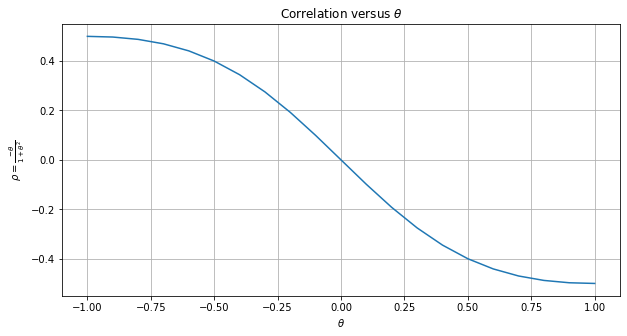

In [149]:
rho = lambda th: -th/(1+th*th)

th = np.arange(-1,1.1,.1)
#print(th)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(th, [r for r in rho(th)])
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$\\rho = \\frac{-\\theta}{1+\\theta^2}$')
ax.set_title('Correlation versus $\\theta$')
ax.grid(visible=True)